In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap



In [2]:
def plot_with_confidence_interval(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    #calcolo l'intervallo di confidenza
    

    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()

    
def plot_with_confidence_interval_log(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    
    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    ax.set_xscale('log', base=2)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()
    
def plot(x_values, y_mean, color, marker, y_label, title, save_path):
    # Genera il grafico
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x_values, y_mean, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()

# Funzione per leggere i dati e calcolare le statistiche

            
            

    

        
            

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
{1: [(1, 0.02691874666666667)], 2: [(2, 0.014986306666666664)], 3: [(3, 0.014964593333333335)], 4: [(4, 0.009771348999999997)], 5: [(5, 0.009935958666666666)], 6: [(6, 0.009850223999999998)], 7: [(7, 0.009996666666666666)], 8: [(8, 0.0073315306666666665)], 9: [(9, 0.007547118666666668)], 10: [(10, 0.007600061333333333)], 11: [(11, 0.007385633)], 12: [(12, 0.0076037226666666674)], 13: [(13, 0.007756327333333334)], 14: [(14, 0.007514985333333332)], 15: [(15, 0.007572762666666666)], 16: [(16, 0.007011761000000001)], 17: [(17, 0.006877167999999999)], 18: [(18, 0.006840808)], 19: [(19, 0.006932768333333333)], 20: [(20, 0.006930236)], 21: [(21, 0.006707381666666667)], 22: [(22, 0.0067188156666666676)], 23: [(23, 0.006711276999999999)], 24: [(24, 0.006722365666666666)]}


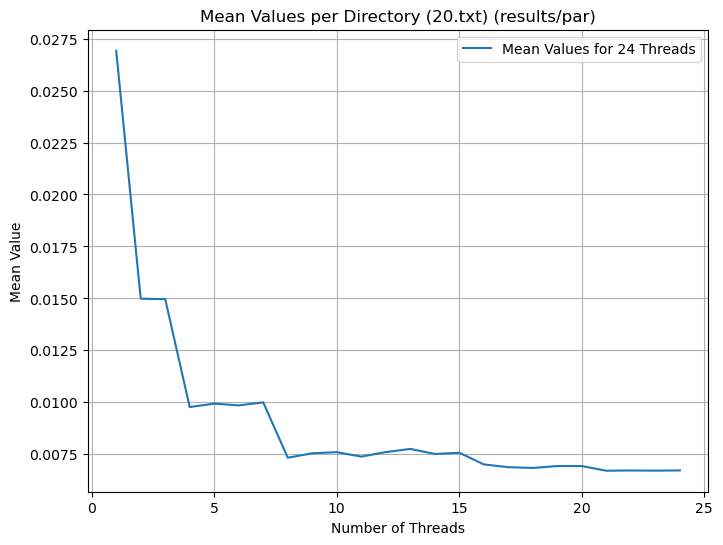

[1.7962228630047168, 1.7988291473785456, 2.7548649287490066, 2.7092249041830425, 2.7328055348453675, 2.6927722574191404, 3.6716407378686546, 3.566758104064085, 3.5419117670278455, 3.6447446910328023, 3.540206270893275, 3.4705532025423373, 3.5820092086229853, 3.5546798244656475, 3.8390850268094803, 3.9142197292063647, 3.935024439608109, 3.882827951604711, 3.884246751000495, 4.013301762809085, 4.006471973954537, 4.010972377785431, 4.004356204564297]


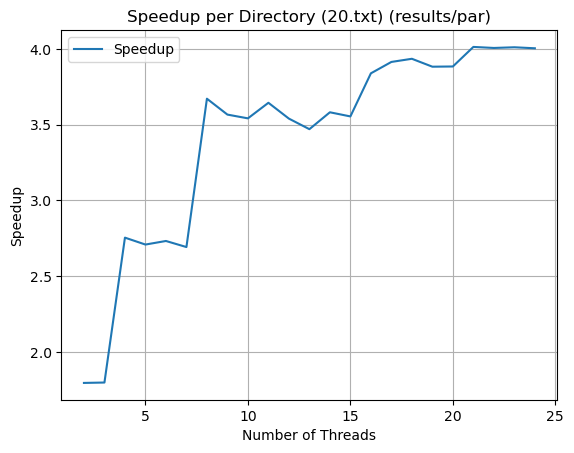

In [3]:
import os
import matplotlib.pyplot as plt

# Define the directory path
base_dir = os.path.join('..', 'results', 'par')

# Initialize an empty dictionary to store data
data = {}

dirs = os.listdir(base_dir)
dirs = [int(dir) for dir in dirs]

dirs.sort()
print(dirs)

# Loop through directories in the base directory
for dir in dirs:
  # Construct the path for the current directory
  dir_path = os.path.join(base_dir, str(dir))

  # Check if it's a directory (not a file)
  if os.path.isdir(dir_path):
    # Initialize an empty list for this directory's data
    data[dir] = []

    # Process only the "20.txt" file
    file_path = os.path.join(dir_path, '16.txt')

    # Check if the file exists
    if os.path.isfile(file_path):
      # Open the file and calculate the mean
      with open(file_path, 'r') as f:
        lines = f.readlines()
        tot = 0
        for line in lines:
          tot += float(line)
        mean = tot / len(lines)
        #print(dir, mean)

        # Append the mean value and thread count (assuming thread count is in the directory name)
        data[dir].append((dir, mean))

# Sort the data by thread count
#data = sorted(data(data.items(), key=lambda item: item[1]))
print(data)

#order on key


# Prepare the plot
plt.figure(figsize=(8, 6))

x,y = [], []

# Loop through directories and their data
for key, value in data.items():
    #print( value)
    x.append(int(value[0][0]))
    y.append(value[0][1])
  # Plot the data for this directory with a unique label
plt.plot(x, y, label=f"Mean Values for {key} Threads")

# Set labels and title
plt.xlabel("Number of Threads")
plt.ylabel("Mean Value")
plt.title("Mean Values per Directory (20.txt) (results/par)")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('mean_values-O2.png')
plt.show()

#print the speedup for every thread
speedup = []
for i in range(1,len(y)):
    speedup.append(y[0]/y[i])
print(speedup)
plt.plot(x[1:], speedup, label=f"Speedup")
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.title("Speedup per Directory (20.txt) (results/par)")
plt.legend()
plt.grid(True)
plt.savefig('speedup-O2.png')
plt.show()



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


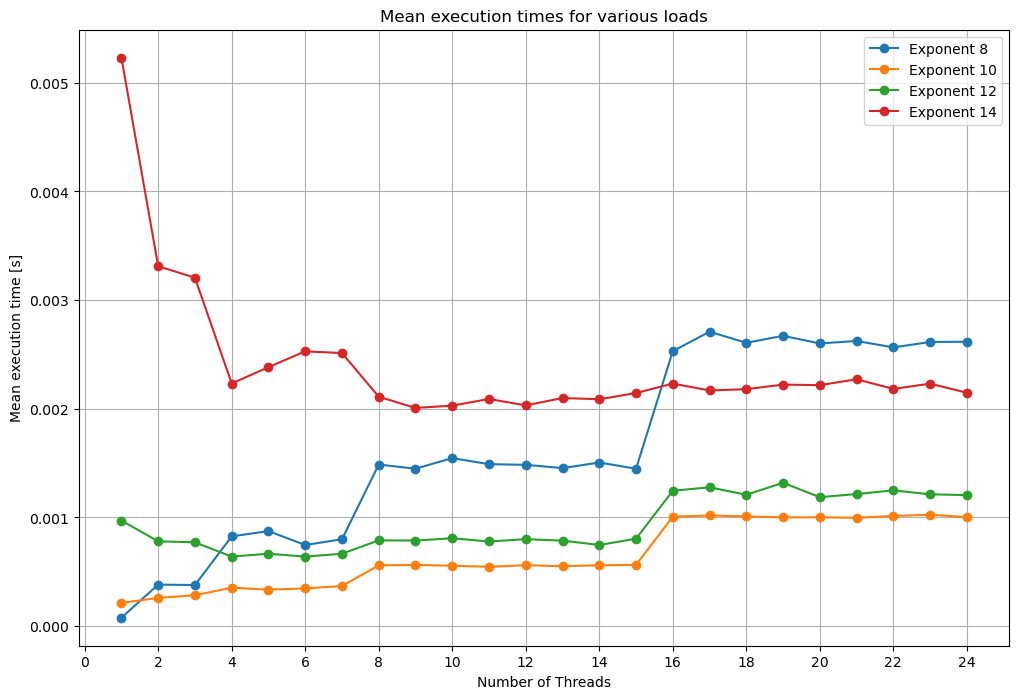

In [4]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Define the directory path
base_dir = os.path.join('..', 'results', 'par')

# Initialize an empty dictionary to store data
data = {}

dirs = os.listdir(base_dir)
dirs = [int(dir) for dir in dirs]
dirs.sort()
print(dirs)

#initialize the plot
plt.figure(figsize=(12, 8))

# Loop through directories 
for i in range(8, 16, 2):
    data.clear()  # Clear data dictionary for each iteration

    #open the thread directory
    for dir in dirs:
        #iterate for i.txt
        file_path = os.path.join(base_dir, str(dir), fr"{i}.txt")
        with open(file_path, 'r') as f:
            lines = f.readlines()
            tot = 0
            for line in lines:
                tot += float(line)
            mean = tot / len(lines)

            # Append the mean value and thread count (assuming thread count is in the directory name)
            data[dir] = mean

    x, y = [], []

    # Loop through directories and their data
    for key, value in data.items():
        x.append(int(key))
        y.append(value)
    
    # Plot the data for this directory with a unique label
    plt.plot(x, y, label=f"Exponent {i}", marker='o')

# Set labels and title
plt.xlabel("Number of Threads")
plt.ylabel("Mean execution time [s]")
plt.title("Mean execution times for various loads")

# Add legend
plt.legend()

plt.gca().xaxis.set_major_locator(MultipleLocator(2))  # Set major ticks at every multiple of 2

# Show the plot
plt.grid(True)
plt.savefig('mean_values-base.png')
plt.show()


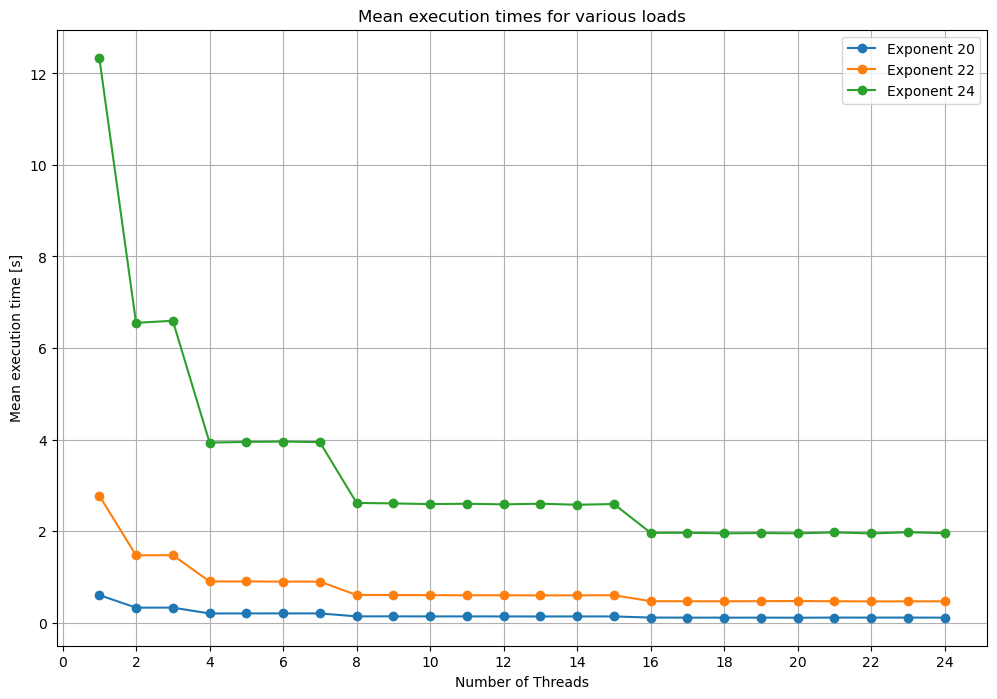

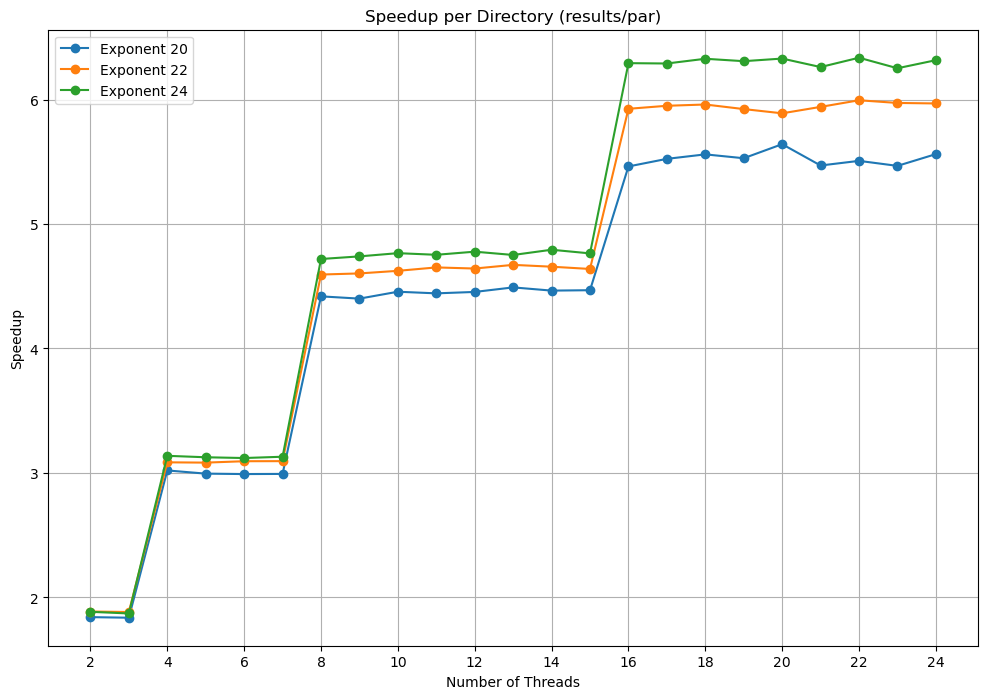

In [5]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Define the directory path
base_dir = os.path.join('..', 'results', 'par')

# Initialize the figure for execution time
plt.figure(figsize=(12, 8))

dirs = os.listdir(base_dir)
dirs = [int(dir) for dir in dirs]
dirs.sort()

# Plot mean execution times for each exponent
for i in range(20, 25, 2):
    data = {}  # Initialize data dictionary for each iteration

    for dir in dirs:
        file_path = os.path.join(base_dir, str(dir), fr"{i}.txt")
        with open(file_path, 'r') as f:
            lines = f.readlines()
            tot = sum(float(line) for line in lines)
            mean = tot / len(lines)
            data[dir] = mean

    x, y = [], []

    for key, value in data.items():
        x.append(int(key))
        y.append(value)

    # Plot mean execution time
    plt.plot(x, y, label=f"Exponent {i}", marker='o')

# Set labels and title for execution time plot
plt.xlabel("Number of Threads")
plt.ylabel("Mean execution time [s]")
plt.title("Mean execution times for various loads")
plt.legend()
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True)
plt.savefig('mean_execution_time.png')
plt.show()

# Initialize the figure for speedup
plt.figure(figsize=(12, 8))

# Plot speedup for each exponent
for i in range(20, 25, 2):
    speedup = []  # Initialize speedup list for each iteration

    for dir in dirs:
        
        file_path = os.path.join(base_dir, str(dir), fr"{i}.txt")
        with open(file_path, 'r') as f:
            lines = f.readlines()
            mean = sum(float(line) for line in lines) / len(lines)
            if dir == 1:
                speedup.append(mean)
            else:
                speedup.append(speedup[0] / mean)

    # Plot speedup for this exponent
    plt.plot(x[1:], speedup[1:], label=f"Exponent {i}", marker='o')

# Set labels and title for speedup plot
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.title("Speedup per Directory (results/par)")
plt.legend()
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.grid(True)
plt.savefig('speedup.png')
plt.show()


In [6]:
def getDataToPlot(mode):
    base_dir = os.path.join('..', 'results', mode)

    # Initialize an empty dictionary to store data
    
    data = {}
    dirs = os.listdir(base_dir)
    dirs = [int(dir) for dir in dirs]

    dirs.sort()

    #open the thread directory
    for dir in dirs:
            #iterate for i.txt
    
        with open(f'{base_dir}/{dir}/{24}.txt', 'r') as f:
            lines = f.readlines()
            tot = 0
            for line in lines:
                tot += float(line)
            mean = tot / len(lines)
                #print(dir, mean)
    
                # Append the mean value and thread count (assuming thread count is in the directory name)
            data[dir] = mean
        # Sort the data by thread count
        #data = sorted(data(data.items(), key=lambda item: item[1]))
    print(data)
    x,y = [], []
    
        # Loop through directories and their data
    for key, value in data.items():
        #print( value)
        x.append(int(key))
        y.append(value)
    
    return x, y


{1: 12.34345, 2: 6.5496246666666655, 3: 6.595829, 4: 3.9337173333333335, 5: 3.948359333333334, 6: 3.9561479999999998, 7: 3.9429923333333337, 8: 2.615680666666667, 9: 2.6040609999999993, 10: 2.589952333333333, 11: 2.5970903333333335, 12: 2.5834610000000002, 13: 2.5978660000000016, 14: 2.575131666666666, 15: 2.5909526666666665, 16: 1.9616390000000004, 17: 1.9625186666666659, 18: 1.9507240000000003, 19: 1.9567196666666666, 20: 1.9502166666666667, 21: 1.9714710000000002, 22: 1.9481396666666664, 23: 1.9744976666666665, 24: 1.954252}
{1: 3.314522666666668, 2: 1.7758553333333331, 3: 1.7718963333333335, 4: 1.0649720000000003, 5: 1.0634163333333335, 6: 1.064205666666667, 7: 1.0642306666666665, 8: 0.7236690666666665, 9: 0.7241191333333332, 10: 0.7205444, 11: 0.7247214, 12: 0.7235838333333334, 13: 0.7270527999999998, 14: 0.7231493333333331, 15: 0.7266258666666668, 16: 0.6343714666666667, 17: 0.6363880000000001, 18: 0.6344122, 19: 0.6406812666666667, 20: 0.6363717999999999, 21: 0.6381294999999999,

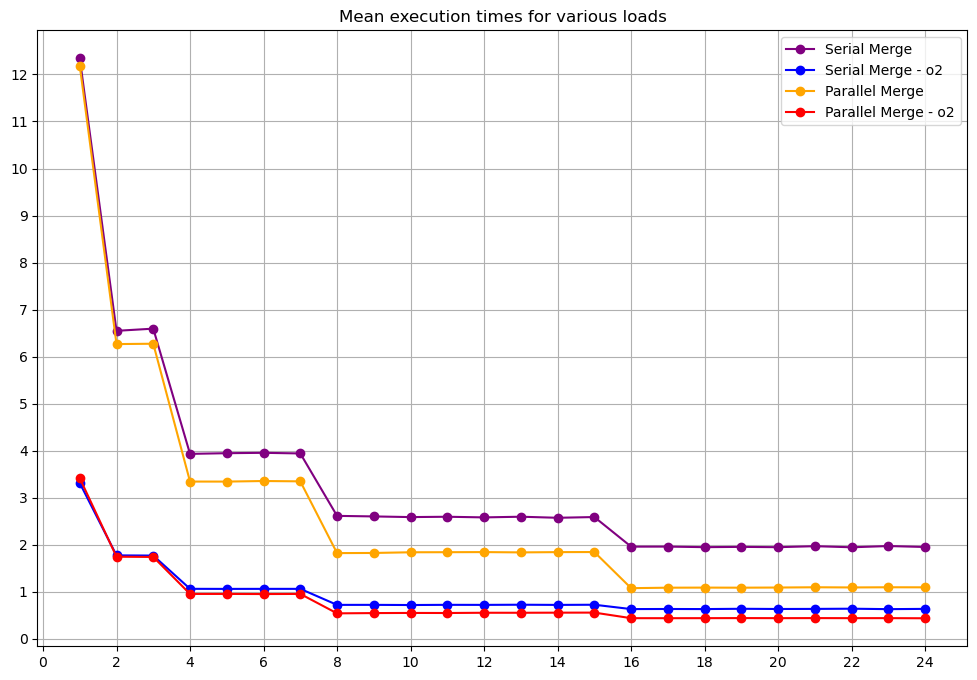

In [7]:
import os
import matplotlib.pyplot as plt

# Define the directory path
base_dir = os.path.join('..', 'results', 'par')

# Initialize the plot
plt.figure(figsize=(12, 8))

#data for par
x, y = getDataToPlot('par')
plt.plot(x, y, label=f"Serial Merge", marker='o', color='purple')

#data for parO2
x, y = getDataToPlot('parO2')
plt.plot(x, y, label=f"Serial Merge - o2", marker='o', color='blue')

#data for parM
x, y = getDataToPlot('parM')
plt.plot(x, y, label=f"Parallel Merge", marker='o', color='orange')

#data for parMO2
x, y = getDataToPlot('parMO2')
plt.plot(x, y, label=f"Parallel Merge - o2", marker='o', color='red')

plt.title("Mean execution times for various loads")
# Add legend
plt.legend()



# Show the plot
plt.grid(True)
plt.yticks(np.arange(0, 13, 1))
plt.xticks(np.arange(0, 25, 2))
plt.savefig('mean_values-base.png')
plt.show()